#  **Web Scrapping**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Only the second time flying BA ...
1,✅ Trip Verified | I wasn't going to bother rev...
2,✅ Trip Verified | I booked business class tic...
3,✅ Trip Verified | I will never travel with Br...
4,✅ Trip Verified | I am already in Portugal so...


In [5]:
df.to_csv("BA_reviews.csv")

In [6]:
df.head()

,reviews
0,Not Verified | Only the second time flying BA ...
1,✅ Trip Verified | I wasn't going to bother rev...
2,✅ Trip Verified | I booked business class tic...
3,✅ Trip Verified | I will never travel with Br...
4,✅ Trip Verified | I am already in Portugal so...


In [7]:
df.describe()

,reviews
count,2000
unique,2000
top,Not Verified | Only the second time flying BA ...
freq,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [19]:
# Cleaning the text in the reviews.
df['reviews'] = df['reviews'].str.replace(r'(✅ Trip Verified \|)|(Not Verified \|)', '')

/tmp/ipykernel_34/1982156615.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(r'(✅ Trip Verified \|)|(Not Verified \|)', '')


In [21]:
# Creating a new column to store the cleaned reviews.
df['cleaned_reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('[^\w\s]', '')

/tmp/ipykernel_34/2467615118.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('[^\w\s]', '')


In [23]:
# Coping the cleaned reviews to the new column.
df['reviews'] = df['cleaned_reviews']

df = df.drop('cleaned_reviews', axis=1)


In [24]:
df.head()

,reviews
0,only the second time flying ba as first time ...
1,i wasnt going to bother reviewing this flight...
2,i booked business class tickets for my fiancé...
3,i will never travel with british airways agai...
4,i am already in portugal so contacted them to...


In [25]:
from textblob import TextBlob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
# Creating a new column to store the sentiment labels.
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [32]:
# Creating a new column  to store the sentiment labels.
df['sentiment_label'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity > 0)

In [38]:
df.head()

,reviews,sentiment,sentiment_label
0,only the second time flying ba as first time ...,0.035823,True
1,i wasnt going to bother reviewing this flight...,0.148154,True
2,i booked business class tickets for my fiancé...,0.071296,True
3,i will never travel with british airways agai...,-0.059510,False
4,i am already in portugal so contacted them to...,-0.450000,False


In [34]:
#number of positive and negative reviews.
positive = len(df[df['sentiment_label'] == True])
negative = len(df[df['sentiment_label'] == False])

In [37]:
print("Positive reviews:", positive)
print("Negative reviews:", negative)

Positive reviews: 1333
Negative reviews: 667


In [39]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

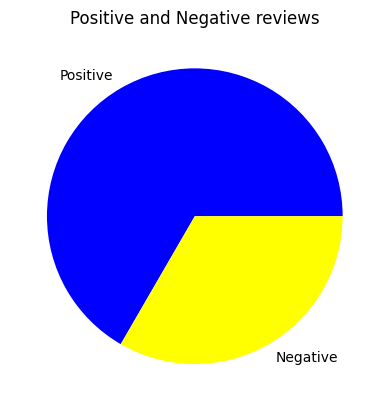

In [46]:
#pie chart
values=[positive,negative]
plt.pie(values,labels=['Positive','Negative'],colors=['blue','yellow'])
plt.title("Positive and Negative reviews")
plt.show

In [50]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

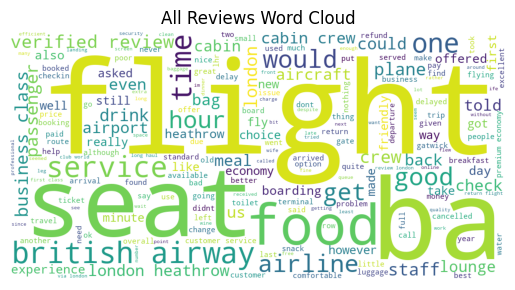

In [51]:
#wordcloud
STOPWORDS = set(stopwords.words('english'))
all_reviews = df['reviews']
words = []
for review in all_reviews:
    words.extend(review.split())
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=STOPWORDS).generate(" ".join(words))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.title('All Reviews Word Cloud')
plt.show()    